# Linear model overfitting
* This simple notebook demonstrates how to overfit a linear regression
* It really isn't that hard
* Also, it shows basic problem for linear regresssion in the "big data" world
* It then tries to fix this using Ridge and Lasso

In [76]:
# Load helpers
# Will try to just load what I need on this
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [77]:
# Function to generate linear data experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if std(eps) = 1)
    sigNoise = np.sqrt(1./M)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=N,loc=0,scale=noise)
    y = np.sum(X,axis=1)+eps
    return X,y

* Model equation:
* $y = \sum_{i=1}^M x_i + \epsilon_i$
* $E(y)=E(x_i) = E(\epsilon)=0$
* $\hat y =  \sum_{i=1}^M x_i$
* $\text{Var}({x_i}) = (1/M)$
* $\text{Var}({\sum x_i}) = 1 = \text{Var} (\hat y)$
* Equals $\epsilon$ or noise variance, if noise = 1
* Variance of y = $\text{Var}(\hat y) + \text{Var}(\epsilon)$
* Variance of y = 1 + 1 = 2
* R-squared = $1-\frac{(N-1)*\text{Var}(\epsilon)}{(N-1)\text{Var}(y)}=( 1 - \frac{1}{2}) = 0.5$

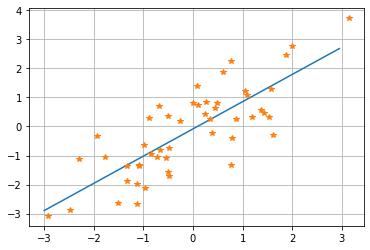

In [78]:
X, y = genLinData(50,1,1.0)
lr = LinearRegression()
lr.fit(X, y)
xtarget = np.arange(start=-3.0,stop=3.0,step=0.05)
xt = xtarget.reshape(len(xtarget),1)
yhat    = lr.predict(xt)
plt.plot(xtarget,yhat)
plt.plot(X,y,"*")
plt.plot()
plt.grid()

In [81]:
# Set up a system that you might have estimated once in your econometrics class
X, y = genLinData(200,2,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.5502793586352566
0.48124160279486794


In [82]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.65885973 1.04095232]
lr.intercept_: 0.20399119466991084


## Now increase right hand side forecast variables (a lot)

In [88]:
# Set up a system you would be told never to try in your econometrics class
X, y = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6808236088877091
-0.3817118156632482


# Overfitting
* This regression is clearly overfitting
* Try many different runs of this
* This is a form of overfitting
* **Note:**  The model is technically the correct model

## A quick monte-carlo example
* Note: you can do this many times
* This is known as a monte-carlo
* See code below
* There is a big for loop 
* Statistics for each run are stored in numpy vector (scoreVec)

In [95]:
nmc = 500
scoreVec = np.zeros(nmc)
for i in range(nmc):
    X, y = genLinData(200,50,1.0)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    # Now run regression
    # print score, which is R-squared (fit)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    scoreVec[i] = lr.score(X_test,y_test)
print(np.mean(scoreVec))
print(np.std(scoreVec))
print(np.mean(scoreVec<0))

-0.056589423932722996
0.24394819320781433
0.528


In [90]:
# A function to automate MC experiments
def MCtraintest(nmc,X,y,modelObj,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

In [96]:
X, y = genLinData(200,50,1.0)
lr = LinearRegression()
trainS, testS = MCtraintest(500,X,y,lr,0.5)
print(np.mean(trainS))
print(np.std(trainS))
print(np.mean(testS))
print(np.std(testS))

0.7202938723384411
0.045496948831382736
-0.20024775954112023
0.23152654625274632


### Increase sample size
* The ultimate solution for overfitting

In [97]:
# Set up a system you would be told never to try in your econometrics class
X, y = genLinData(20000,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.49162580006682516
0.5034100487612816


## Complex functions
* Add polynomial features where there are none
* Scikit Learn polynomial features function
* $y=b_0 + b_1 x + b_2 x^2 + b_3 x^3 + \ldots $


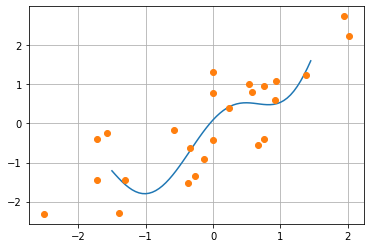

In [103]:
from sklearn.preprocessing import PolynomialFeatures
X, y = genLinData(25,1,1.0)
poly = PolynomialFeatures(degree=7)
Xpoly = poly.fit_transform(X)
lr.fit(Xpoly,y)
xt = np.arange(start=-1.5,stop=1.5,step=0.05)
xtarget = xt.reshape(len(xt),1)
xtargetPoly = poly.fit_transform(xtarget)
yhat = lr.predict(xtargetPoly)
plt.plot(xtarget,yhat)
plt.plot(X,y,'o')
plt.grid()
# print(Xpoly)

In [109]:
X, y = genLinData(50,1,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
poly = PolynomialFeatures(degree=7)
Xpoly_train = poly.fit_transform(X_train)
Xpoly_test  = poly.fit_transform(X_test)
lr.fit(Xpoly_train,y_train)
print(lr.score(Xpoly_train,y_train))
print(lr.score(Xpoly_test,y_test))

0.7805925109719885
-0.1673685914808758


# Ridge and Lasso ----

# Try Ridge and Lasso
* Control overfitting
* Parameter alpha now added
* Note: In this experiment no coefficients are zero

In [118]:
X, y = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.6302158420742051
0.36242841138017595


In [124]:
X, y = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.6123416473659897
0.14803452726945876


# A more complicated model
* Set some of the parameters to zero
* This may give even more overfitting
* Can also see how well Lasso gets zeros
* Finding irrelevant information

In [125]:
# Function to generate linear data experiments
# Now drop some coefficients to zero (sparse)
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if eps = 1)
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller beta to zero
    beta[abs(beta)<1.0] = 0.
    betaUsed= np.sum( beta != 0.)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # Modern Python with matrix multiplication
    y = X @ beta + eps
    # Find theoretical best R-squared 
    sse = np.sum(eps**2)
    meany = np.mean(y)
    sse2 = np.sum( (y-meany)**2)
    trsquared = 1. - sse/sse2
    # Old style Python
    # X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    # eps = np.random.normal(size=N,loc=0,scale=noise)
    # y = np.sum(X,axis=1)+eps
    return X,y,betaUsed,trsquared

### Ordinary least squares

In [126]:
X, y, nvar, trs = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(trs)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(nvar)
print(lr.coef_)
print(np.mean(np.abs(lr.coef_)))
print(np.sum(lr.coef_!=0))

0.5117550042422836
0.7826269595268323
-0.16165976103625934
14
[[-3.01349293e-01 -2.24407278e+00  1.08698110e+00  1.46428484e-03
   2.87625839e+00  1.01710345e+00  2.20324905e+00  1.93426693e-02
  -2.47174845e+00  1.80599035e+00 -1.01607937e+00  2.62370519e-01
  -1.46628553e-01 -5.50893014e-01  6.47500993e-01  5.35537043e-01
  -1.05539383e+00 -2.21919140e+00 -1.19570779e+00  2.63931634e-01
  -1.39609171e+00 -7.87601320e-01  1.73235330e+00 -3.05716209e-01
   2.57899634e+00 -1.75295654e+00 -1.25673208e+00  4.78563030e+00
   2.72394387e-01  3.38025119e+00 -3.05864709e-01  5.73019941e-01
   2.69869766e+00 -5.62412983e-02  4.08253268e-01  7.56803664e-01
  -4.29597307e-01 -1.41353778e-01 -9.75920418e-02  4.42433066e-01
   2.84937940e+00 -1.18479336e+00  1.16220071e+00 -2.51570364e+00
   1.33525786e+00  4.99660819e-02  5.24928225e-01 -1.10198121e+00
  -6.94365790e-01 -6.93403782e-01]]
1.1638270827612027
50


### Now quick monte-carlo

In [127]:
nmc = 1000
scoreVec = np.zeros(nmc)
scoreVecInSamp = np.zeros(nmc)
trsVec = np.zeros(nmc)
for i in range(nmc):
    X, y, nvar, trs = genLinData(250,50,1.0)
    trsVec[i] = trs
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    # Now run regression
    # print score, which is R-squared (fit)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    scoreVecInSamp[i] = lr.score(X_train,y_train)
    scoreVec[i] = lr.score(X_test,y_test)
print(np.mean(trsVec))
print(np.mean(scoreVecInSamp))
print(np.mean(scoreVec))
print(np.mean(scoreVec<0))


0.4340192181881749
0.6636461706272556
0.018934703600057015
0.418


### Ridge regression

In [128]:
X, y, nvar, trs = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print(trs)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))
print(nvar)
print(ridge.coef_)
print(np.mean(np.abs(ridge.coef_)))
print(np.sum(ridge.coef_!=0))

0.45511969847796774
0.6520702419421494
0.23350977505183235
17
[[ 0.17015394 -0.82761649 -0.43109037 -1.27384248  0.18373044 -0.35431999
   0.53168231 -0.62791659 -0.24759256  0.06836831 -0.3603374   0.53737374
  -1.00913689 -1.09974103 -0.77369359 -0.10776131  0.34284253  0.60080409
  -0.1925334   1.05161455 -0.20636497 -0.27880304  0.67068373 -1.12649931
   0.34244029 -0.04538607 -0.17787471  0.76285855 -0.92361021 -0.43184387
   0.91894013 -0.4637596  -0.21972635 -0.09797793 -1.89686149 -0.77245623
   0.63906827 -0.1830806  -0.08281724 -0.6997603  -0.04730691 -0.76279963
  -0.32514477 -0.01941144  0.21394583 -0.39007657 -0.22534093  0.30567489
  -1.02888189  0.57455554]]
0.5125220664265492
50


### Monte-carlo for Ridge

In [129]:
nmc = 1000
scoreVec = np.zeros(nmc)
scoreVecInSamp = np.zeros(nmc)
trsVec = np.zeros(nmc)
for i in range(nmc):
    X, y, nvar, trs = genLinData(250,50,1.0)
    trsVec[i] = trs
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    # Now run regression
    # print score, which is R-squared (fit)
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    scoreVecInSamp[i] = ridge.score(X_train,y_train)
    scoreVec[i] = ridge.score(X_test,y_test)
print(np.mean(trsVec))
print(np.mean(scoreVecInSamp))
print(np.mean(scoreVec))
print(np.mean(scoreVec<0))


0.434418527980755
0.5928849706368247
0.24313523265525117
0.016


### Lasso regression

In [131]:
X, y, nvar, trs = genLinData(200,50,1.0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
# Now run regression
# print score, which is R-squared (fit)
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)
print(trs)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(nvar)
print(lasso.coef_)
print(np.mean(np.abs(lasso.coef_)))
print(np.sum(lasso.coef_!=0))

0.4766985589834687
0.6484865026499906
0.18354432888358663
13
[-0.         -0.          0.05123075 -0.         -0.         -1.46181678
 -2.57005686 -0.54462588 -0.          2.76106956  2.77417913  0.46841493
 -0.          0.01899875 -1.02461637  0.          0.         -0.
  0.          0.         -0.73777972  0.38628045  0.          0.82074723
  1.82314029 -0.          0.38131716  0.6135143  -1.47525448  1.62806354
  0.          0.12463412  0.47836877  1.12144804  0.88043718 -0.12937665
  0.          0.83523062 -0.          0.58991758 -0.          0.
 -0.          0.8581768   1.11052159 -0.         -0.63284531  0.
 -0.          0.        ]
0.5260412564939729
27


### Monte-carlo for Lasso

In [132]:
nmc = 1000
scoreVec = np.zeros(nmc)
scoreVecInSamp = np.zeros(nmc)
trsVec = np.zeros(nmc)
for i in range(nmc):
    X, y, nvar, trs = genLinData(250,50,1.0)
    trsVec[i] = trs
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    # Now run regression
    # print score, which is R-squared (fit)
    lasso = Lasso(alpha=0.005)
    lasso.fit(X_train, y_train)
    scoreVecInSamp[i] = lasso.score(X_train,y_train)
    scoreVec[i] = lasso.score(X_test,y_test)
print(np.mean(trsVec))
print(np.mean(scoreVecInSamp))
print(np.mean(scoreVec))
print(np.mean(scoreVec<0))

0.43425022630415866
0.6176815929346151
0.2292835237575616
0.045
